In [256]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:

def get_page(p):
    url = 'https://auto.drom.ru/all/page{}/?minpower=50'.format(p)
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    books = tree.find_all('a', {"class": "css-4zflqt e1huvdhj1"})

    infa = []

    for book in books:
        pric = book.find('span', {"class": "css-46itwz e162wx9x0"}).text[0:-2]
        price = int(pric.replace('\xa0', ''))
        try:
            info = book.find('div', {"class": "css-16kqa8y e3f4v4l2"}).text
        except:
            info = book.find('div', {"class": "css-d4igzo e3f4v4l2"}).text
        year = int(info.split(',')[1])
        model = info.split(',')[-2]
        dvig = list(book.find('span', {'class' : "css-1l9tp44 e162wx9x0"}))[0]
        volume = float(dvig[:3])
        if volume < 10:
            volume = volume
        else:
            volume = 0
        hors = dvig[-9:-5]
        horse = int(hors.strip('('))
        tip = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[1].text
        typpe = tip.strip(',')
        try:
            corob = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[2].text
            box = corob.strip(',')
            if box == 'АКПП' or box == 'вариатор' or box == 'механика' or box == 'автомат' or box == 'робот Коробка':
                box = box
            else:
                box = None            
        except:
            box = None           
        prob = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[-1].text.strip(' км')
        try:
            probeg = int(prob.replace(' ', ''))
        except:
            probeg = 0 #делаем ноль, потому что чаще всего это новые машины, и лишь иногда у машин просто не указан пробег
        try:
            priv = book.find_all('span', {'class' : "css-1l9tp44 e162wx9x0"})[3].text
            privod = priv.strip(',')
        except:
            privod = None
        infa.append({'Цена': price, 'Год': year, 'Модель' : model, 'Двигатель (л)' : volume, 'ЛС': horse, 'Коробка': box, 'Тип': typpe, 'Привод': privod, 'Пробег, км': probeg})

    return infa

infa = []

for p in range(1, 101):
    infa.extend(get_page(p))

df = pd.DataFrame(infa)
print(df.shape)
df

(2000, 9)


,Цена,Год,Модель,Двигатель (л),ЛС,Коробка,Тип,Привод,"Пробег, км"
0,5590000,2020,BMW 5-Series,2.0,184,АКПП,бензин,задний,31400
1,4250000,2022,Toyota bZ4X,0.0,214,АКПП,электро,4WD,212
2,5200000,2023,BYD Tang,1.5,137,вариатор,бензин,передний,200
3,1590000,2015,Nissan Teana,2.5,173,вариатор,бензин,передний,124000
4,3850000,2023,Geely Monjaro,2.0,238,АКПП,бензин,4WD,10
...,...,...,...,...,...,...,...,...,...
1995,1100000,2019,Лада Веста,1.6,106,механика,бензин,передний,97000
1996,370000,2003,Лада 4x4 2121 Нива,1.7,79,механика,бензин,4WD,190000
1997,520000,1999,Toyota Vista,1.8,130,АКПП,бензин,передний,61632
1998,650000,2016,Лада Гранта,1.6,87,механика,бензин,передний,113300


In [271]:
df.isna().sum()

Цена               0
Год                0
Модель             0
Двигатель (л)      0
ЛС                 0
Коробка          142
Тип                0
Привод             0
Пробег, км         0
dtype: int64

In [272]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [273]:
df.drop('index', axis=1, inplace=True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Цена           1858 non-null   int64  
 1   Год            1858 non-null   int64  
 2   Модель         1858 non-null   object 
 3   Двигатель (л)  1858 non-null   float64
 4   ЛС             1858 non-null   int64  
 5   Коробка        1858 non-null   object 
 6   Тип            1858 non-null   object 
 7   Привод         1858 non-null   object 
 8   Пробег, км     1858 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 130.8+ KB


In [276]:
df.loc[df['Тип'] == 'электро', 'Двигатель (л)'] = None

In [277]:
df

,Цена,Год,Модель,Двигатель (л),ЛС,Коробка,Тип,Привод,"Пробег, км"
0,5590000,2020,BMW 5-Series,2.0,184,АКПП,бензин,задний,31400
1,4250000,2022,Toyota bZ4X,NaN,214,АКПП,электро,4WD,212
2,5200000,2023,BYD Tang,1.5,137,вариатор,бензин,передний,200
3,1590000,2015,Nissan Teana,2.5,173,вариатор,бензин,передний,124000
4,3850000,2023,Geely Monjaro,2.0,238,АКПП,бензин,4WD,10
...,...,...,...,...,...,...,...,...,...
1853,1100000,2019,Лада Веста,1.6,106,механика,бензин,передний,97000
1854,370000,2003,Лада 4x4 2121 Нива,1.7,79,механика,бензин,4WD,190000
1855,520000,1999,Toyota Vista,1.8,130,АКПП,бензин,передний,61632
1856,650000,2016,Лада Гранта,1.6,87,механика,бензин,передний,113300


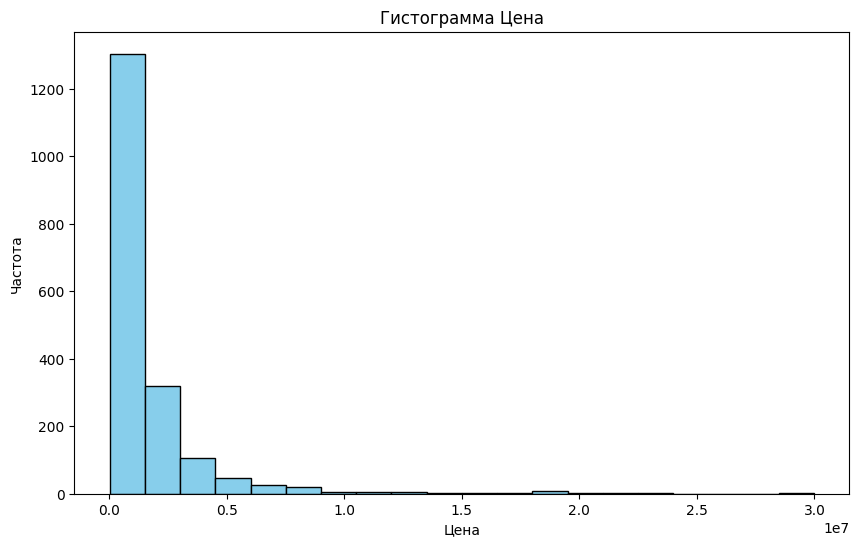

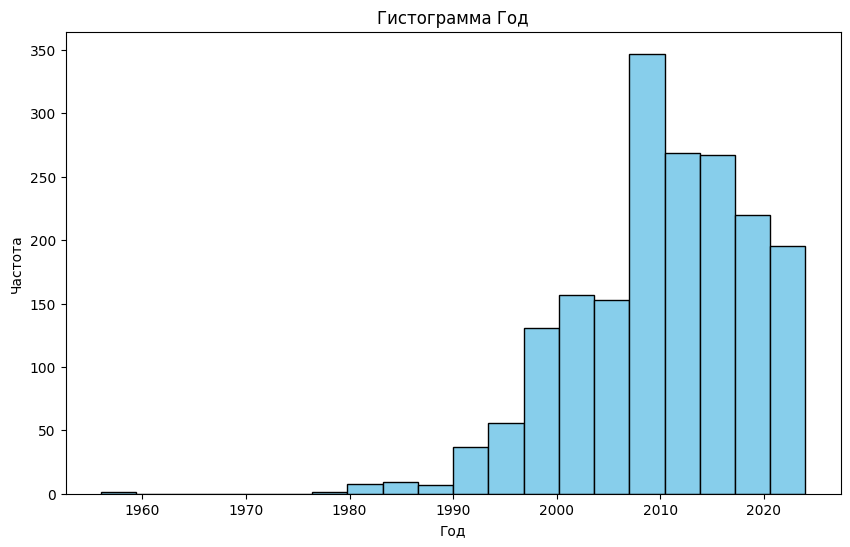

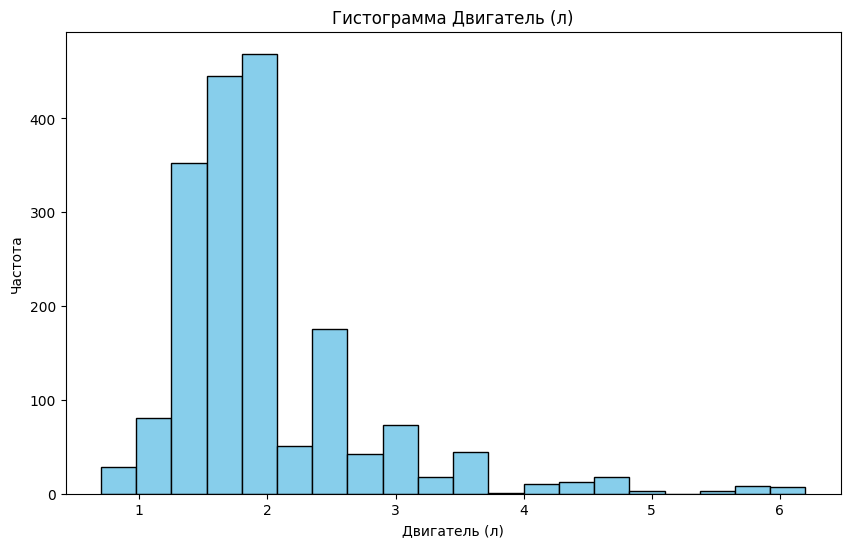

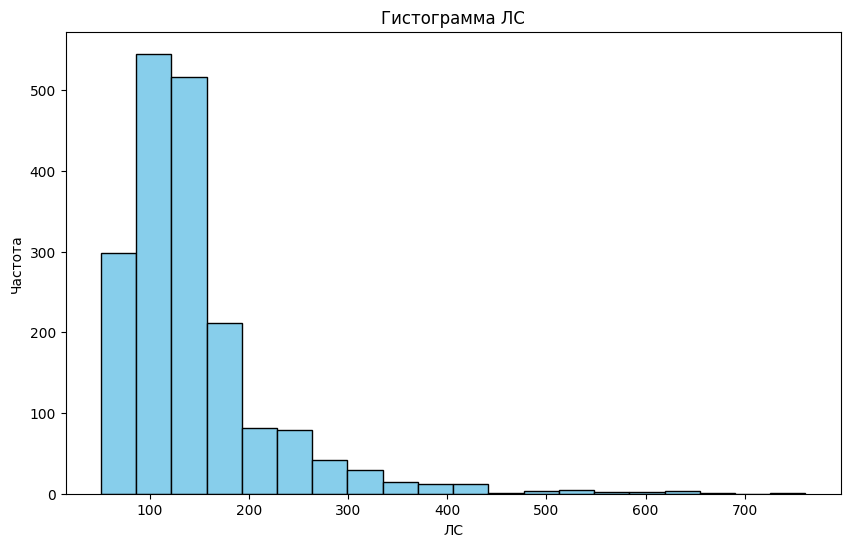

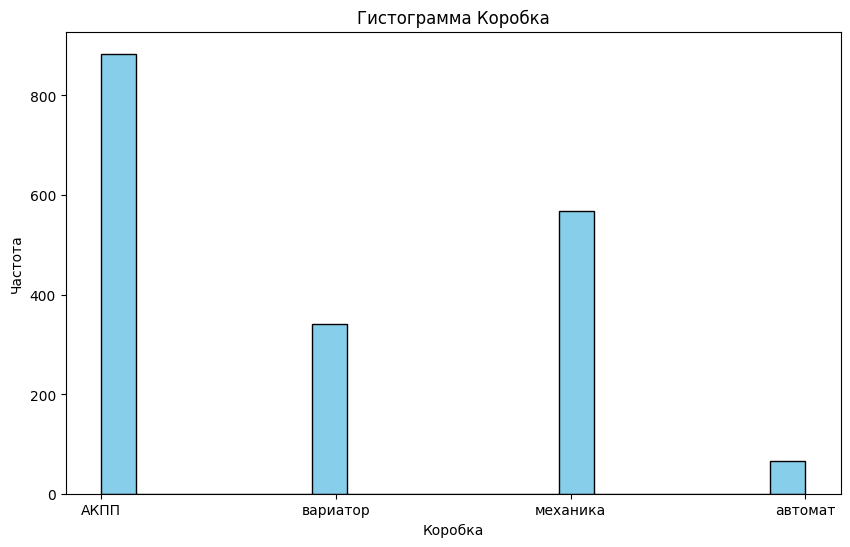

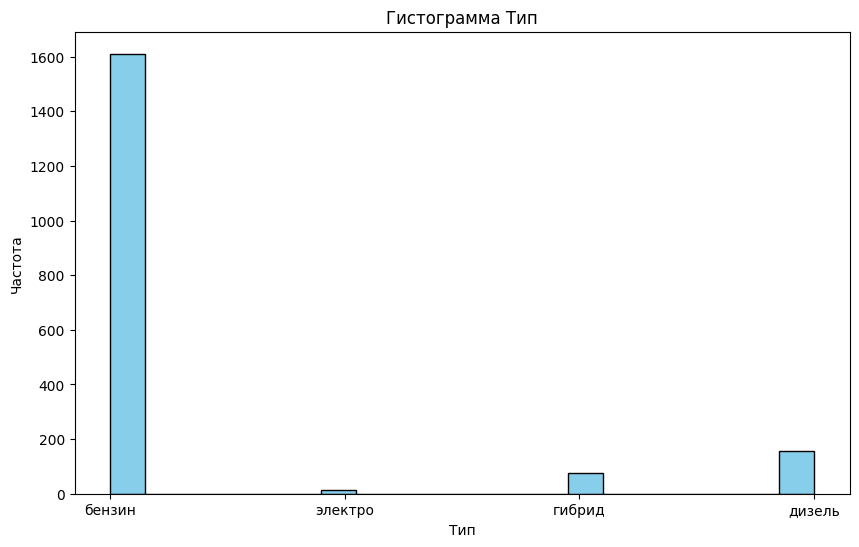

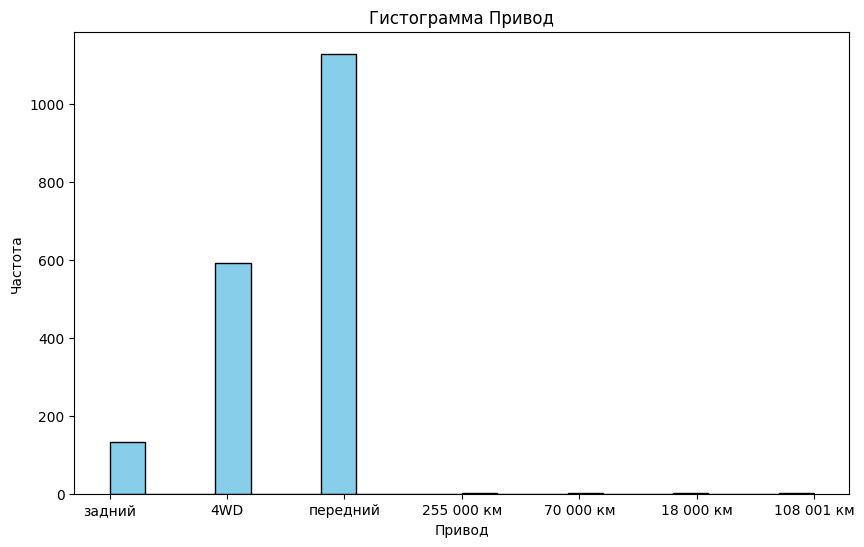

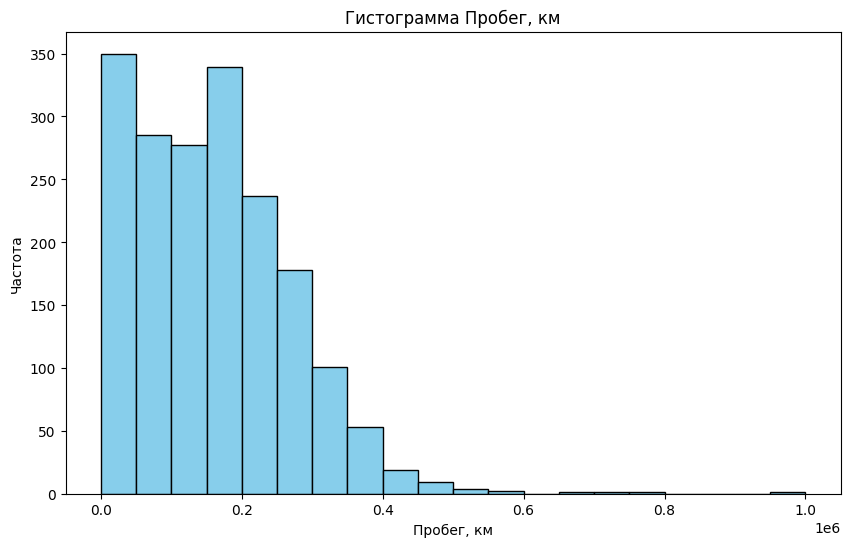

In [279]:
for column in df.columns:
    if column != 'Модель':
        plt.figure(figsize=(10, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.title(f'Гистограмма {column}')

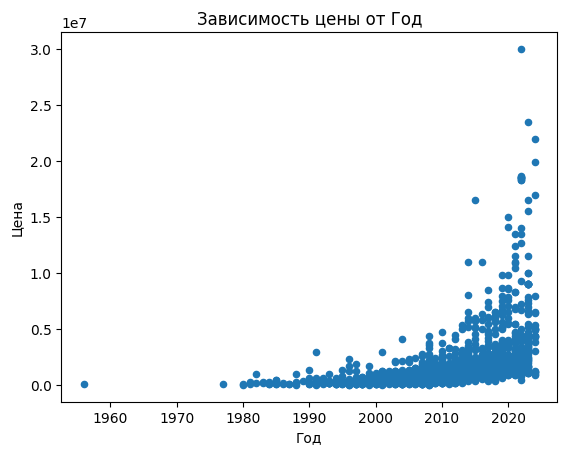

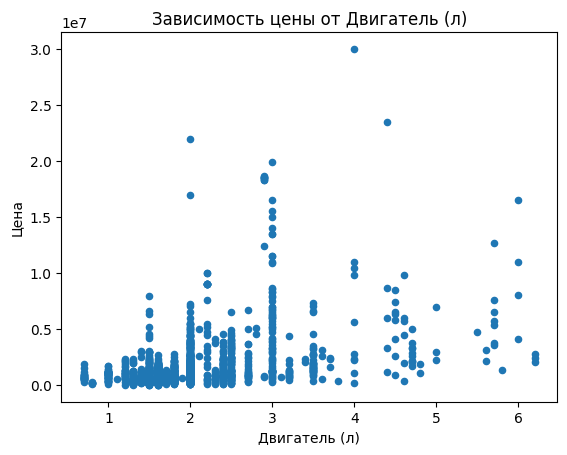

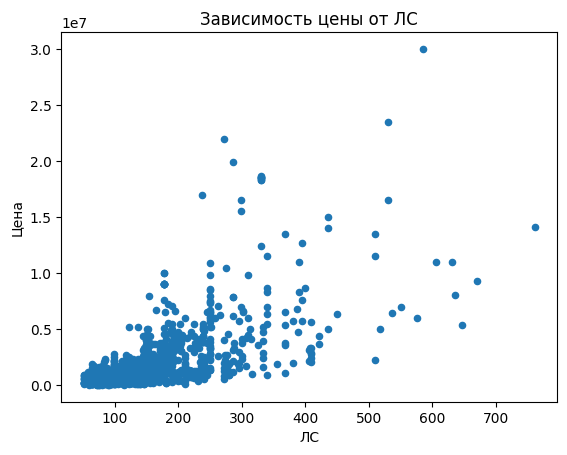

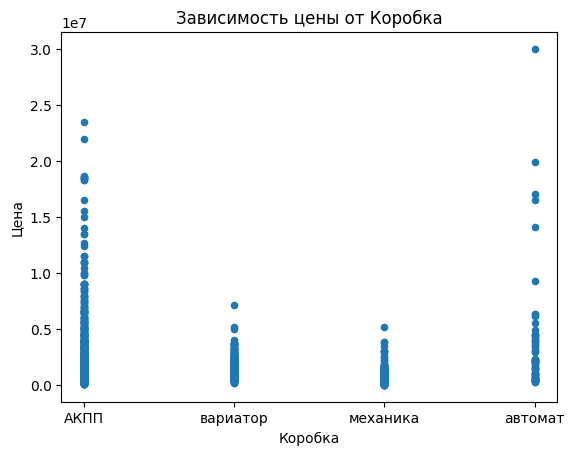

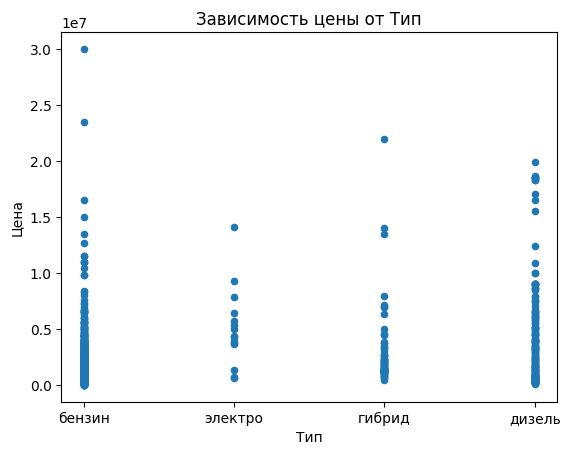

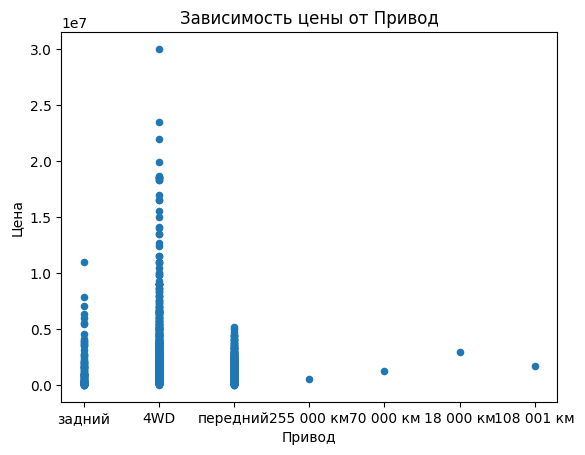

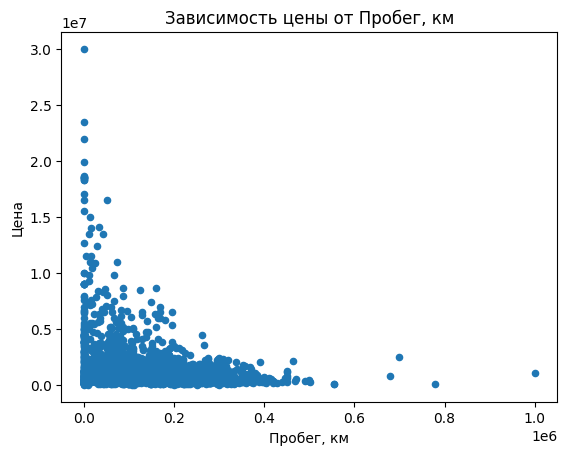

In [280]:
for column in df.columns:
    if column != 'Цена' and column != 'Модель' :  
        df.plot(x=column, y='Цена', kind='scatter')
        plt.xlabel(column)
        plt.ylabel('Цена')
        plt.title(f'Зависимость цены от {column}')
        plt.show()

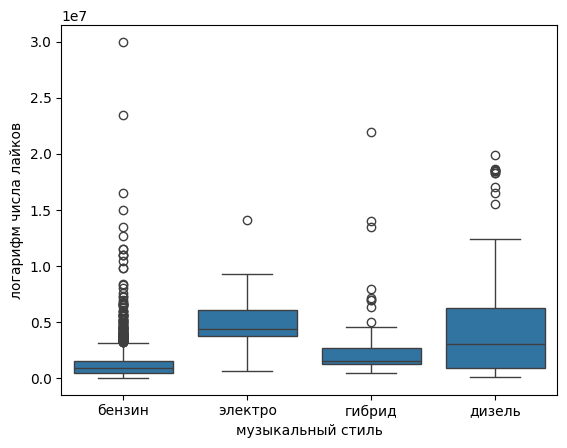

In [281]:
sns.boxplot(x='Тип', y='Цена', data=df)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

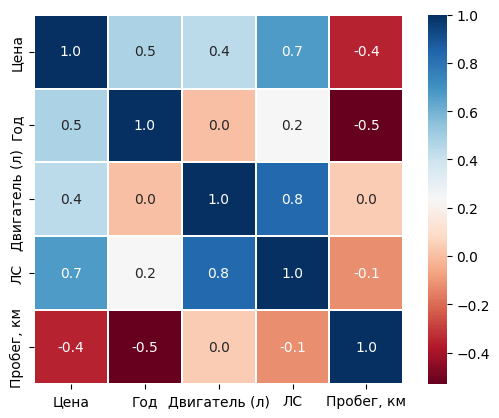

In [282]:
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

sns.heatmap(df[num_columns].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");